In [1]:
import pandas as pd

#for text processing
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

#for training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Pre-processing

In [4]:
data = pd.read_csv('E:\\VIDND\\Projects\\Spam Mail Classification\\Email spam.csv')

In [5]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
data.describe(include="all")

,text,spam
count,5728,5728.000000
unique,5695,NaN
top,"Subject: re : contact info glenn , please , ...",NaN
freq,2,NaN
mean,NaN,0.238827
std,NaN,0.426404
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [7]:
spam_data = data['spam'].value_counts()

<AxesSubplot:>

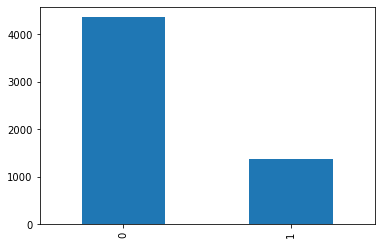

In [8]:
spam_data.plot(kind='bar')

In [9]:
data.duplicated().sum()

33

In [10]:
data.drop_duplicates(inplace=True) # drops duplicate values in rows

In [11]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5690,Subject: re : research and development charges...,0
5691,"Subject: re : receipts from visit jim , than...",0
5692,Subject: re : enron case study update wow ! a...,0
5693,"Subject: re : interest david , please , call...",0


In [12]:
for i in range(data.shape[0]): # removing 'Subject' from text
    data.loc[i, 'text'] = data.loc[i, 'text'].split(' ', 1)[1]

In [13]:
data.to_csv('Cleaned_Data.csv', index=False)

# Obtaining cleaned tokens

In [2]:
data = pd.read_csv('E:\\VIDND\\Projects\\Spam Mail Classification\\Cleaned_Data.csv')

In [3]:
data.rename(columns={'text':'Email Text', 'spam':'Label'}, inplace=True)

In [4]:
data

,Email Text,Label
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1
...,...,...
5690,re : research and development charges to gpg ...,0
5691,"re : receipts from visit jim , thanks again ...",0
5692,re : enron case study update wow ! all on the...,0
5693,"re : interest david , please , call shirley ...",0


In [5]:
#Tokenize function

def tokenize(text):
    #converting to lowercase & remove punctuation 
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower().strip()) 
    
    #tokenize
    tokens = word_tokenize(text) 
    
    #remove stopwords 
    words = [w for w in tokens if w not in stopwords.words("english")] 
    
    #lemmatize
    lemmatized_words = [WordNetLemmatizer().lemmatize(w) for w in words]
    clean_tokens = lemmatized_words
    
    #convert list elements to string
    text = ' '.join(clean_tokens)
    
    return text

In [6]:
data['Processed Text'] = data['Email Text'].apply(lambda x: tokenize(x)) 

In [7]:
data

,Email Text,Label,Processed Text
0,naturally irresistible your corporate identity...,1,naturally irresistible corporate identity lt r...
1,the stock trading gunslinger fanny is merrill...,1,stock trading gunslinger fanny merrill muzo co...
2,unbelievable new homes made easy im wanting t...,1,unbelievable new home made easy im wanting sho...
3,4 color printing special request additional i...,1,4 color printing special request additional in...
4,"do not have money , get software cds from here...",1,money get software cd software compatibility g...
...,...,...,...
5690,re : research and development charges to gpg ...,0,research development charge gpg forwarded shir...
5691,"re : receipts from visit jim , thanks again ...",0,receipt visit jim thanks invitation visit lsu ...
5692,re : enron case study update wow ! all on the...,0,enron case study update wow day super thank mu...
5693,"re : interest david , please , call shirley ...",0,interest david please call shirley crenshaw as...


# Training

In [8]:
X = data['Email Text']
y = data['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
pipeline = Pipeline([
    ('vect',CountVectorizer(tokenizer=tokenize)), 
    ('tfidf',TfidfTransformer()), 
    ('classifier',MultinomialNB())
])
pipeline

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000002A71F1B0DC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000002A71F1B0DC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

# Testing

In [17]:
# predictedVals = pipeline.predict(X_test)
predictedVals

numpy.ndarray

In [13]:
AccuracyScore = accuracy_score(y_test, predictedVals)
AccuracyScore = round(AccuracyScore,2)
print('Accuracy: ',AccuracyScore)

Accuracy:  0.74


In [14]:
ClassificationReport = classification_report(y_test, predictedVals)
print(ClassificationReport)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       843
           1       0.00      0.00      0.00       296

    accuracy                           0.74      1139
   macro avg       0.37      0.50      0.43      1139
weighted avg       0.55      0.74      0.63      1139



D:\anaconda\envs\Use\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\Use\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\Use\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
confusion_matrix(y_test, predictedVals)

NameError: name 'y_test' is not defined

# Rough stuff

In [18]:
print(1 in predictedVals)

False


In [ ]:
s = 'foo bar too much'
s.split(' ', 1)[1]

In [ ]:
data.shape[0]

In [ ]:
data.loc[0]

In [ ]:
len(range(1, 5696))

In [ ]:
app = 0
for i in range(1, 5696):
    data.loc[i, 'text'] = data.loc[i, 'text'].split(' ',1)[1]

In [ ]:
data.loc[5695, 'text'].split(' ',1)[1]

In [ ]:
data.loc[1, 'text'].split(' ',1)[1]

In [ ]:
len(range(1, 5696))

In [ ]:
flag = 0
for i in range(data.shape[0]):
    if data.loc[i, 'text'].contains('Subject:') == True:
        flag = flag + 1

In [3]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
t = 'tejas joshi jejas toshi a dka aa'
t.strip()

'tejas joshi jejas toshi a dka aa'